# HW 2 - Python Template



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftfreq

## Part 1: Basic DSP Applications in Python
### Task 1. Create a Python script that generates a sine wave with a frequency of 1000 Hz and a duration of 2 seconds. Plot the waveform using the matplotlib library.

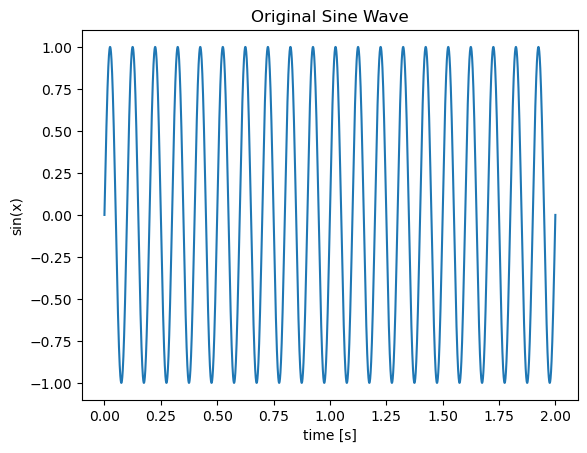

In [2]:
# Suggestion: Use the numpy function np.linspace() to generate the time samples, and np.sin() to generate the sine wave.
# Be sure to use a sampling frequency that follows Nyquist-Shannon Sampling Theorem
# Then use plt.plot() to plot the waveform.
# Remember to label your plot axes
frequency = 10
duration = 2
sampleRate = 2500
angular_frquency = 2*np.pi*frequency
x = np.linspace(0,2,sampleRate*duration)
sinx = np.sin(x*angular_frquency)
plt.plot(x, sinx)
plt.title('Original Sine Wave')
plt.xlabel('time [s]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### Task 2. Create a Python script that applies a low-pass filter to the sine wave generated in task 1. The cutoff frequency of the low-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.



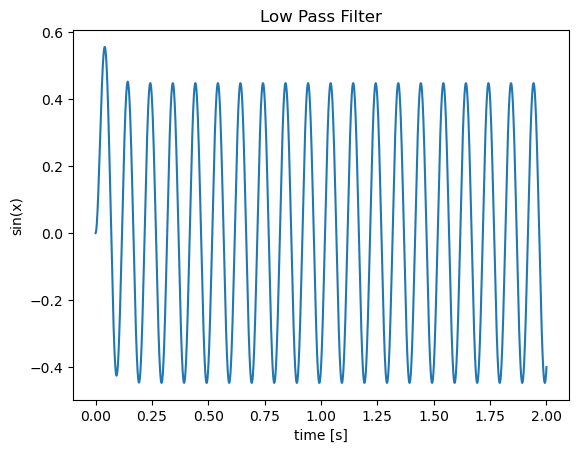

In [3]:
# Use a Buttworth filter for your lowpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'low', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.
b, a = sig.butter(1,5,btype = 'low',fs = sampleRate)
y = sig.lfilter(b,a,sinx)
plt.plot(x , y)
plt.title('Low Pass Filter')
plt.xlabel('time [s]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### Task 3. Create a Python script that applies a high-pass filter to the sine wave generated in task 1. The cutoff frequency of the high-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.



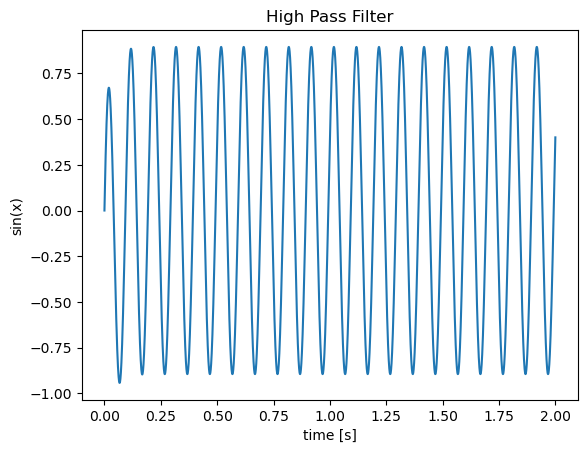

In [4]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.
b, a = sig.butter(1, 5, btype='highpass', fs = sampleRate)
y = sig.lfilter(b,a,sinx)
plt.plot(x,y)
plt.title('High Pass Filter')
plt.xlabel('time [s]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### Task 4. Create a Python script that applies a band-pass filter to the sine wave generated in task 1. The cutoff frequencies of the band-pass filter should be 400 Hz and 600 Hz. Plot the filtered waveform using the matplotlib library.

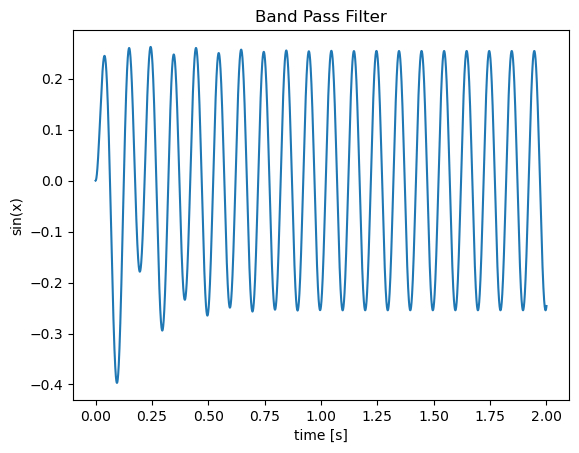

In [5]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Make sure to read on how to input two critical frequencies
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.
b, a = sig.butter(1, [4,6], btype='bandpass', fs = sampleRate)
y = sig.lfilter(b,a,sinx)
plt.plot(x,y)
plt.title('Band Pass Filter')
plt.xlabel('time [s]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### Task 5. Create a Python script that performs convolution of the sine wave generated in task 1 with a rectangular window of length 100 samples. Plot the convolved signal using the matplotlib library.

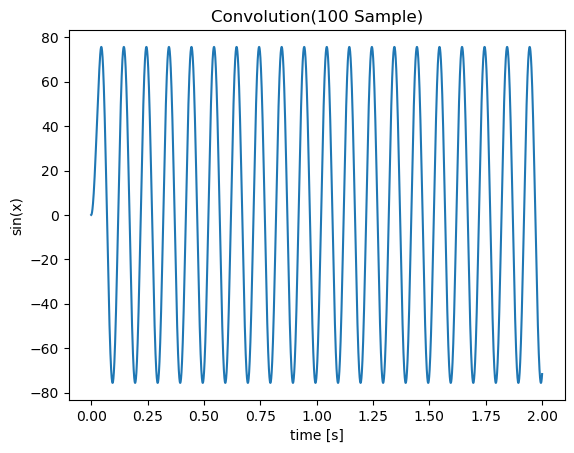

In [6]:
# Suggestion: Create a rectangular window of length 100 samples using the np.ones() function.
# Then use the convolve() function from numpy to perform the convolution.
# Finally, use plt.plot() to plot the convolved signal.
rect_window = np.ones(100)
z = np.convolve(sinx,rect_window)
z0 = z[:len(x)]
plt.plot(x,z0)
plt.title('Convolution(100 Sample)')
plt.xlabel('time [s]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### Task 6. Create a Python script that performs moving average of the sine wave generated in task 1 with a window of length 10 samples. Plot the filtered signal using the matplotlib library.

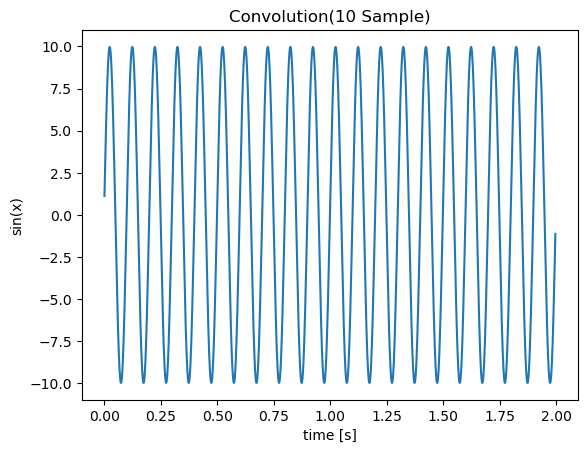

In [7]:
# Suggestion: Use the numpy function np.convolve() with mode='valid' to perform the moving average.
# Can also be accomplished with for/while loop
# Then use plt.plot() to plot the filtered signal.
rect_window_2 = np.ones(10)
z1 = np.convolve(sinx,rect_window_2, 'valid')
x2 = x[:len(z1)]
plt.plot(x2,z1)
plt.title('Convolution(10 Sample)')
plt.xlabel('time [s]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### 7. Compare the filtered waveforms obtained in tasks 2, 3, 4, 5 and 6 with the original waveform generated in task 1. Write a a few paragraphs in your notebook explaining the results obtained and the implications of each filter/operation type on the signal.

In Task 2, applying a low pass filter means that the only frequency below 5Hz passes through.The signal amplitude is lower than the original signal.
In Task 3, applying a high pass filter means that the only frequenct above 5Hz passes through. The signal amplitude is higher than the signal in Task 2.
In Task 4, applying a band pass filter means that only frequency between 4Hz and 6Hz passes through. The amplitude of the signal is the lowest among the previous waveforms (from ~-0.3 - 0.2)
In Task 5, the convolution of the sine wave and a rectangular window of 100 samples will increase the amplitude by 80 times compared to the original signal. In Task 6, the convolution of the sine wave and a rectangular window of 10 samples will increase the amplitude by 10 times compared to the original signal

## Part 2: Advanced DSP Applications in Python

### Task 1. Create a Python script that generates a signal that is a sum of two sine waves with different frequencies and amplitudes. The first sine wave should have a frequency of 1000 Hz and an amplitude of 1, the second sine wave should have a frequency of 2000 Hz and an amplitude of 0.5. Plot the waveform using the matplotlib library.

In [8]:
# Suggestions:
# - Use the numpy library's sine function to generate the sine waves
# - Use the numpy library's arange function to create an array of time values
# - Use the matplotlib library's plot function to plot the waveform

### Task 2. Create a Python script that applies a Butterworth filter to the signal generated in task 1. The cutoff frequency of the filter should be 1500 Hz and the filter order should be 4. Plot the filtered waveform using the matplotlib library.

In [9]:
# Suggestions:
# - Use the scipy library's signal butter function to generate the Butterworth filter
# - Use the scipy library's lfilter function to apply the filter to the signal
# - Use the matplotlib library's plot function to plot the filtered waveform
# - Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# - Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

### Task 3. Create a Python script that computes the Fast Fourier Transform (FFT) of the signal generated in task 1. Plot the magnitude and phase of the FFT using the matplotlib library.

In [10]:
# Use the fft function to get the Fourier Transform of the sine wave. ex. X = fft(x)
# Documentation for fft: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html
# To get the magnitude of the fft use np.abs(). ex. mag = np.abs(X)
# To get the phase of the fft use np.angle(). ex. phase = np.angle(X)
# Additionally, you can use fftfreq to get the independent axis for your plots. ex. freq = fftfreq(len(X), 1/fs)
# Documentation for fftfreq: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html